In [225]:
from isochrones.dartmouth import Dartmouth_Isochrone
dar = Dartmouth_Isochrone()

In [226]:
from isochrones.utils import addmags
import numpy as np
M1 = 1.
M2 = 0.7
age = np.log10(5e9)
feh = 0.0
distance = 200
AV = 0.1

#Simulate true magnitudes
unresolved_bands = ['J','H','K']
resolved_bands = ['i']
args = (age, feh, distance, AV)
unresolved = {b:addmags(dar.mag[b](M1, *args), dar.mag[b](M2, *args)) for b in unresolved_bands}
resolved_1 = {b:dar.mag['i'](M1, *args) for b in resolved_bands}
resolved_2 = {b:dar.mag['i'](M2, *args) for b in resolved_bands}

In [227]:
import pandas as pd

instruments = ['twomass','RAO']
bands = {'twomass':['J','H','K'],
          'RAO':['i']}
mag_unc = {'twomass': 0.02, 'RAO':0.1}
resolution = {'twomass':4.0, 'RAO':0.1}
relative = {'twomass':False, 'RAO':True}
separation = 0.5
PA = 100.

columns = ['name', 'band', 'resolution', 'relative', 'separation', 'pa', 'mag', 'e_mag']
df = pd.DataFrame(columns=columns)
i=2
for inst in ['twomass']:  #Unresolved observations
    for b in bands[inst]:
        row = {}
        row['name'] = inst
        row['band'] = b
        row['resolution'] = resolution[inst]
        row['relative'] = relative[inst]
        row['separation'] = 0.
        row['pa'] = 0.
        row['mag'] = unresolved[b]
        row['e_mag'] = mag_unc[inst]
        df = df.append(pd.DataFrame(row, index=[i]))
        i += 2

for inst in ['RAO']:  #Resolved observations
    for b in bands[inst]:
        mags = [resolved_1[b], resolved_2[b]]
        pas = [0, PA]
        seps = [0., separation]
        for mag,sep,pa in zip(mags,seps,pas):
            row = {}
            row['name'] = inst
            row['band'] = b
            row['resolution'] = resolution[inst]
            row['relative'] = relative[inst]
            row['separation'] = sep
            row['pa'] = pa
            row['mag'] = mag
            row['e_mag'] = mag_unc[inst]
            df = df.append(pd.DataFrame(row, index=[i]))
            i += 2
            
df

,band,e_mag,mag,name,pa,relative,resolution,separation
2,J,0.02,9.925142,twomass,0.0,False,4.0,0.0
4,H,0.02,9.533282,twomass,0.0,False,4.0,0.0
6,K,0.02,9.475713,twomass,0.0,False,4.0,0.0
8,i,0.10,11.028637,RAO,0.0,True,0.1,0.0
10,i,0.10,13.180917,RAO,100.0,True,0.1,0.5


In [228]:
from isochrones.observation import ObservationTree

In [229]:
t = ObservationTree.from_df(df, name='First')
t.define_models(dar)
t.print_ascii()

First
 ╚═ twomass H=(9.53, 0.02) @(0.00, 0 [4.00])
    ╚═ twomass J=(9.93, 0.02) @(0.00, 0 [4.00])
       ╚═ twomass K=(9.48, 0.02) @(0.00, 0 [4.00])
          ╠═ RAO i=(11.03, 0.10) @(0.00, 0 [0.10])
          ║  ╚═ 0_0
          ╚═ RAO i=(13.18, 0.10) @(0.50, 100 [0.10])
             ╚═ 0_1


In [230]:
from isochrones.starmodel import StarModel

In [231]:
mod = StarModel(dar, obs=t)

In [232]:
%timeit mod.lnlike(p = [1.0,1.0,10,0.0,200,0.1],use_cache=False)

The slowest run took 13.60 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 88.5 µs per loop


In [233]:
mag = addmags(dar.mag['W1'](M1, *args), dar.mag['W1'](M2, *args))
e_mag = 0.02
              
row = {}
row['name'] = 'some telescopes'
row['band'] = 'W1'
row['resolution'] = 5.0
row['relative'] = False
row['separation'] = 0.
row['pa'] = 0.
row['mag'] = mag
row['e_mag'] = e_mag
df = df.append(pd.DataFrame(row, index=[0]))

t = ObservationTree.from_df(df, name='First')
t.define_models(dar)
t.print_ascii()

First
 ╚═ some telescopes W1=(9.45, 0.02) @(0.00, 0 [5.00])
    ╚═ twomass H=(9.53, 0.02) @(0.00, 0 [4.00])
       ╚═ twomass J=(9.93, 0.02) @(0.00, 0 [4.00])
          ╚═ twomass K=(9.48, 0.02) @(0.00, 0 [4.00])
             ╠═ RAO i=(11.03, 0.10) @(0.00, 0 [0.10])
             ║  ╚═ 0_0
             ╚═ RAO i=(13.18, 0.10) @(0.50, 100 [0.10])
                ╚═ 0_1


In [234]:
mod = StarModel(dar, obs=t)

In [235]:
%timeit mod.lnlike(p = [1.0,1.0,10,0.0,200,0.1],use_cache=False)

The slowest run took 27.38 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 101 µs per loop


In [236]:
mag = addmags(dar.mag['W2'](M1, *args), dar.mag['W2'](M2, *args))
e_mag = 0.02
              
row = {}
row['name'] = 'some telescopes'
row['band'] = 'W2'
row['resolution'] = 5.0
row['relative'] = False
row['separation'] = 0.
row['pa'] = 0.
row['mag'] = mag
row['e_mag'] = e_mag
df = df.append(pd.DataFrame(row, index=[1]))

t = ObservationTree.from_df(df, name='First')
t.define_models(dar)
t.print_ascii()

First
 ╚═ some telescopes W1=(9.45, 0.02) @(0.00, 0 [5.00])
    ╚═ some telescopes W2=(9.49, 0.02) @(0.00, 0 [5.00])
       ╚═ twomass H=(9.53, 0.02) @(0.00, 0 [4.00])
          ╚═ twomass J=(9.93, 0.02) @(0.00, 0 [4.00])
             ╚═ twomass K=(9.48, 0.02) @(0.00, 0 [4.00])
                ╠═ RAO i=(11.03, 0.10) @(0.00, 0 [0.10])
                ║  ╚═ 0_0
                ╚═ RAO i=(13.18, 0.10) @(0.50, 100 [0.10])
                   ╚═ 0_1


In [237]:
mod = StarModel(dar, obs=t)

In [238]:
%timeit mod.lnlike(p = [1.0,1.0,10,0.0,200,0.1],use_cache=False)

The slowest run took 14.68 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 113 µs per loop


In [239]:
mag = addmags(dar.mag['r'](M1, *args), dar.mag['r'](M2, *args))
e_mag = 0.01
              
row = {}
row['name'] = 'some telescopes'
row['band'] = 'r'
row['resolution'] = 3.5
row['relative'] = False
row['separation'] = 0.
row['pa'] = 0.
row['mag'] = mag
row['e_mag'] = e_mag
df = df.append(pd.DataFrame(row, index=[3]))

t = ObservationTree.from_df(df, name='First')
t.define_models(dar)
t.print_ascii()

First
 ╚═ some telescopes W1=(9.45, 0.02) @(0.00, 0 [5.00])
    ╚═ some telescopes W2=(9.49, 0.02) @(0.00, 0 [5.00])
       ╚═ twomass H=(9.53, 0.02) @(0.00, 0 [4.00])
          ╚═ twomass J=(9.93, 0.02) @(0.00, 0 [4.00])
             ╚═ twomass K=(9.48, 0.02) @(0.00, 0 [4.00])
                ╚═ some telescopes r=(11.05, 0.01) @(0.00, 0 [3.50])
                   ╠═ RAO i=(11.03, 0.10) @(0.00, 0 [0.10])
                   ║  ╚═ 0_0
                   ╚═ RAO i=(13.18, 0.10) @(0.50, 100 [0.10])
                      ╚═ 0_1


In [240]:
mod = StarModel(dar, obs=t)

In [241]:
%timeit mod.lnlike(p = [1.0,1.0,10,0.0,200,0.1],use_cache=False)

The slowest run took 14.76 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 125 µs per loop


In [242]:
resolved_1 = {'z':dar.mag['z'](M1, *args)}
resolved_2 = {'z':dar.mag['z'](M2, *args)}
e_mag = 0.02
              
mags = [resolved_1['z'], resolved_2['z']]
pas = [0, PA]
seps = [0., separation]
for mag,sep,pa in zip(mags,seps,pas):
    row = {}
    row['name'] = 'some instruments'
    row['band'] = 'z'
    row['resolution'] = 0.15
    row['relative'] = True
    row['separation'] = sep
    row['pa'] = pa
    row['mag'] = mag
    row['e_mag'] = e_mag
    df = df.append(pd.DataFrame(row, index=[7]))

t = ObservationTree.from_df(df, name='First')
t.define_models(dar)
t.print_ascii()

First
 ╚═ some telescopes W1=(9.45, 0.02) @(0.00, 0 [5.00])
    ╚═ some telescopes W2=(9.49, 0.02) @(0.00, 0 [5.00])
       ╚═ twomass H=(9.53, 0.02) @(0.00, 0 [4.00])
          ╚═ twomass J=(9.93, 0.02) @(0.00, 0 [4.00])
             ╚═ twomass K=(9.48, 0.02) @(0.00, 0 [4.00])
                ╚═ some telescopes r=(11.05, 0.01) @(0.00, 0 [3.50])
                   ╠═ some instruments z=(11.00, 0.02) @(0.00, 0 [0.15])
                   ║  ╚═ RAO i=(11.03, 0.10) @(0.00, 0 [0.10])
                   ║     ╚═ 0_0
                   ╚═ some instruments z=(12.98, 0.02) @(0.50, 100 [0.15])
                      ╚═ RAO i=(13.18, 0.10) @(0.50, 100 [0.10])
                         ╚═ 0_1


In [243]:
mod = StarModel(dar, obs=t)

In [244]:
%timeit mod.lnlike(p = [1.0,1.0,10,0.0,200,0.1], use_cache=False)

The slowest run took 14.64 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 143 µs per loop


In [245]:
resolved_1 = {'Kepler':dar.mag['Kepler'](M1, *args)}
resolved_2 = {'Kepler':dar.mag['Kepler'](M2, *args)}
e_mag = 0.01
              
mags = [resolved_1['Kepler'], resolved_2['Kepler']]
pas = [0, 95]
seps = [0., 0.55]
for mag,sep,pa in zip(mags,seps,pas):
    row = {}
    row['name'] = 'some instruments'
    row['band'] = 'Kepler'
    row['resolution'] = 0.1
    row['relative'] = True
    row['separation'] = sep
    row['pa'] = pa
    row['mag'] = mag
    row['e_mag'] = e_mag
    df = df.append(pd.DataFrame(row, index=[11]))

t = ObservationTree.from_df(df, name='First')
t.define_models(dar)
t.print_ascii()

First
 ╚═ some telescopes W1=(9.45, 0.02) @(0.00, 0 [5.00])
    ╚═ some telescopes W2=(9.49, 0.02) @(0.00, 0 [5.00])
       ╚═ twomass H=(9.53, 0.02) @(0.00, 0 [4.00])
          ╚═ twomass J=(9.93, 0.02) @(0.00, 0 [4.00])
             ╚═ twomass K=(9.48, 0.02) @(0.00, 0 [4.00])
                ╚═ some telescopes r=(11.05, 0.01) @(0.00, 0 [3.50])
                   ╠═ some instruments z=(11.00, 0.02) @(0.00, 0 [0.15])
                   ║  ╚═ RAO i=(11.03, 0.10) @(0.00, 0 [0.10])
                   ║     ╚═ some instruments Kepler=(11.10, 0.01) @(0.00, 0 [0.10])
                   ║        ╚═ 0_0
                   ╚═ some instruments z=(12.98, 0.02) @(0.50, 100 [0.15])
                      ╚═ RAO i=(13.18, 0.10) @(0.50, 100 [0.10])
                         ╚═ some instruments Kepler=(13.52, 0.01) @(0.55, 95 [0.10])
                            ╚═ 0_1


In [246]:
mod = StarModel(dar, obs=t)

In [247]:
%timeit mod.lnlike(p = [1.0,1.0,10,0.0,200,0.1], use_cache=False)

The slowest run took 14.54 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 163 µs per loop


In [248]:
resolved_1 = {'g':dar.mag['g'](M1, *args)}
resolved_2 = {'g':dar.mag['g'](M2, *args)}
e_mag = 0.02
              
mags = [resolved_1['g'], resolved_2['g']]
pas = [0, 96]
seps = [0., 0.54]
for mag,sep,pa in zip(mags,seps,pas):
    row = {}
    row['name'] = 'some instruments'
    row['band'] = 'g'
    row['resolution'] = 0.09
    row['relative'] = True
    row['separation'] = sep
    row['pa'] = pa
    row['mag'] = mag
    row['e_mag'] = e_mag
    df = df.append(pd.DataFrame(row, index=[13]))

t = ObservationTree.from_df(df, name='First')
t.define_models(dar)
t.print_ascii()

First
 ╚═ some telescopes W1=(9.45, 0.02) @(0.00, 0 [5.00])
    ╚═ some telescopes W2=(9.49, 0.02) @(0.00, 0 [5.00])
       ╚═ twomass H=(9.53, 0.02) @(0.00, 0 [4.00])
          ╚═ twomass J=(9.93, 0.02) @(0.00, 0 [4.00])
             ╚═ twomass K=(9.48, 0.02) @(0.00, 0 [4.00])
                ╚═ some telescopes r=(11.05, 0.01) @(0.00, 0 [3.50])
                   ╠═ some instruments z=(11.00, 0.02) @(0.00, 0 [0.15])
                   ║  ╚═ RAO i=(11.03, 0.10) @(0.00, 0 [0.10])
                   ║     ╚═ some instruments Kepler=(11.10, 0.01) @(0.00, 0 [0.10])
                   ║        ╚═ some instruments g=(11.69, 0.02) @(0.00, 0 [0.09])
                   ║           ╚═ 0_0
                   ╚═ some instruments z=(12.98, 0.02) @(0.50, 100 [0.15])
                      ╚═ RAO i=(13.18, 0.10) @(0.50, 100 [0.10])
                         ╚═ some instruments Kepler=(13.52, 0.01) @(0.55, 95 [0.10])
                            ╚═ some instruments g=(14.77, 0.02) @(0.54, 96 [0.09])
    

In [249]:
mod = StarModel(dar, obs=t)

In [250]:
%timeit mod.lnlike(p = [1.0,1.0,10,0.0,200,0.1], use_cache=False)

The slowest run took 14.58 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 181 µs per loop


In [251]:
%matplotlib inline
import matplotlib.pyplot as plt

In [254]:
x = range(4,11,1)
y = [88.5,101,113,125,143,163,181]

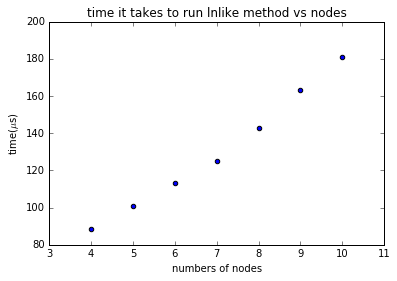

In [259]:
plt.scatter(x,y)
plt.xlabel('numbers of nodes')
plt.ylabel(r'time($\mu$s)')
plt.title('time it takes to run lnlike method vs nodes')